# Hypothesis Testing

## Example: Hypothesis Testing with Boostrapping method
- $H_0:$ The mean of male math score = mean of female math score
- $H_A:$ The mean of male math score $\neq$ mean of female math score


**Notes**:
- specify the null hypothesis
- choose the tests statistics - in this case it's the absolute difference in means
- determine the distribution of the test statistic using boostrapping (sampling with replacement)
- convert the test statistic to p_value 

$$\frac{number \: of \:  boostrapped \: test\:  statistic \geq observed \: test \: statistic}{sample \: size}$$

_reference: https://medium.com/@wenjun.sarah.sun/bootstrap-confidence-interval-in-python-3fe8d5a6fd56_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#read in the data
full_data = pd.read_csv("/Users/zhiying/Documents/OneDrive - The City College of New York/DSE 103 - Applied Stats/Projects/Project 1/exams.csv")



Out of 10000 boostrap samples, 0 of them had a difference in means of 4.31 or higher
p_value: 0.0
Reject the null, gender has statistically significant weights on math score


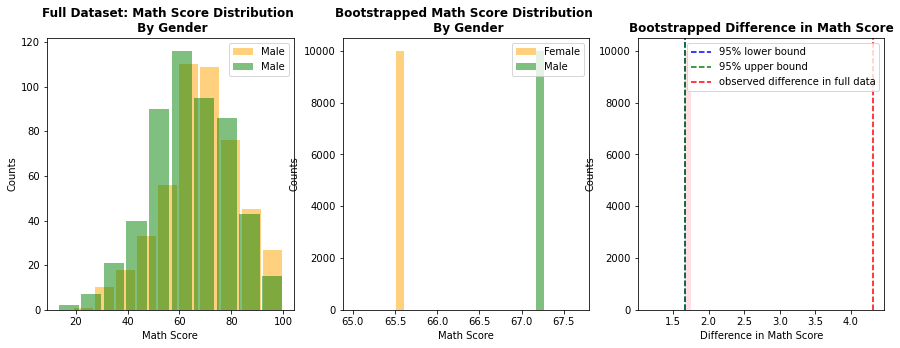

In [6]:
#use the subset of the sample data to do boostrapping (sampling with replacement)
difference_in_means =[]
female_math_means = []
male_math_means = []

###################
#1. bootstrapping
###################

sample_size = 10000
for x in range(sample_size):
    bootstrap = full_data.sample(len(full_data), replace = True,random_state=4)
    FemaleMathMeans = bootstrap[bootstrap['gender']=='female']['math score'].mean()
    MaleMathMeans = bootstrap[bootstrap['gender']=='male']['math score'].mean()
    female_math_means.append(FemaleMathMeans)
    male_math_means.append(MaleMathMeans)
    difference_in_means.append(np.abs(MaleMathMeans - FemaleMathMeans))

#plot the actual data distribution
fig,ax = plt.subplots(ncols= 3,figsize = (15,5))
ax[0].hist(full_data[full_data['gender'] =='male']["math score"], alpha = 0.5,color = 'orange',label = "Male", rwidth = 0.9)
ax[0].hist(full_data[full_data['gender'] =='female']["math score"], alpha = 0.5,color = 'green',label = "Male", rwidth = 0.9)
ax[0].set_title("Full Dataset: Math Score Distribution \n By Gender", fontweight = 'bold')
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Math Score")
ax[0].legend(loc = "upper right")

#plot the two distributions from boostrap
ax[1].hist(female_math_means, alpha = 0.5, color = 'orange', label = "Female", rwidth = 0.9)
ax[1].hist(male_math_means, alpha = 0.5,color = 'green',label = "Male", rwidth = 0.9)
ax[1].set_title("Bootstrapped Math Score Distribution \n By Gender", fontweight = 'bold')
ax[1].set_ylabel("Counts")
ax[1].set_xlabel("Math Score")
ax[1].legend(loc = "upper right")

#plot the bootstrapped difference in math score
ax[2].hist(difference_in_means, alpha = 0.5, color = 'pink', rwidth = 0.9) #looks normally distributed
ax[2].set_title("Bootstrapped Difference in Math Score", fontweight = 'bold')
ax[2].set_ylabel("Counts")
ax[2].set_xlabel("Difference in Math Score")


#####################
#2. testing hypothesis
#####################

#calculate teh observed difference in means from our actual data
obs_diff = np.abs(full_data[full_data['gender'] =='male']["math score"].mean() -
            full_data[full_data['gender'] =='female']["math score"].mean()
           )

#calculate the probability of observing that in our boostrapped distribution
counts_with_diff_greater_than_obs = len([x for x in difference_in_means if x >= obs_diff])
p_value =  counts_with_diff_greater_than_obs/ sample_size
print("Out of %s boostrap samples, %s of them had a difference in means of %s or higher"%(sample_size,counts_with_diff_greater_than_obs,
                                                                                          np.round(obs_diff,2)
                                                                                         ))
print("p_value: %s"%p_value)
if p_value >0.05:
    print("Accept the null, gender has no statistically significant weights on math score")
else:
    print("Reject the null, gender has statistically significant weights on math score")



#calculate the upper and lower confidence interval of the bootstrapped difference in math score
alpha = 0.05
lower_ci = np.percentile(difference_in_means, alpha/2*100)
upper_ci = np.percentile(difference_in_means, 100-alpha/2*100)
ax[2].axvline(lower_ci, color = 'blue', linestyle = '--', label = "95% lower bound")
ax[2].axvline(upper_ci, color = 'green', linestyle = '--',label = "95% upper bound")
ax[2].axvline(obs_diff, color = 'red', linestyle = '--',label = "observed difference in full data" )
ax[2].legend(loc = "upper right")
plt.show()
